In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import hvplot.pandas


## Rhea coding for graphs

In [2]:
path = Path("Resources/cleaned_post_code_registration.csv")
read0 = pd.read_csv(path)

In [3]:
#Total registrations for each fuel type
types= read0.groupby("Fuel Type").sum()
types= types.drop(['Postcode','State'],axis=1)
types

,Registrations as at 31 January 2021,Registrations as at 31 January 2022,Registrations as at 31 January 2023
Fuel Type,,,
Battery Electric Vehicle,15943,34133,72710
Hybrid,204146,276128,361654
Hydrogen Cell Vehicle,0,0,0
Internal Combustion Engine,18263272,18534709,18830991


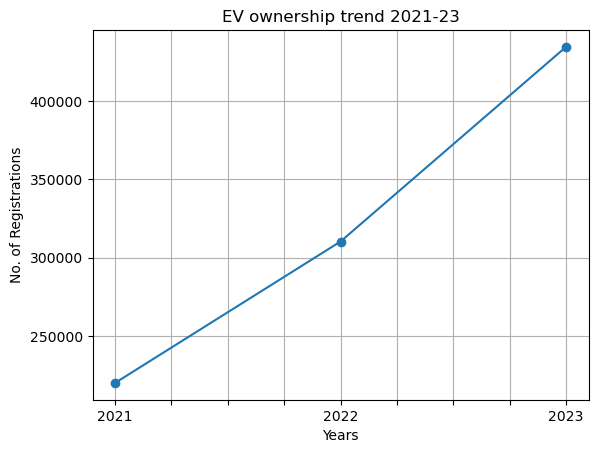

In [4]:
#EV & Hybrid registration trends combined

BEV_data= read0.loc[(read0["Fuel Type"]=="Battery Electric Vehicle")|(read0["Fuel Type"]=="Hybrid"),:]

first_count= BEV_data["Registrations as at 31 January 2021"].sum()
second_count= BEV_data["Registrations as at 31 January 2022"].sum()
third_count= BEV_data["Registrations as at 31 January 2023"].sum()

Total_reg= pd.DataFrame({"2021":[first_count],"2022":second_count,"2023":third_count}).T
Total_reg.plot(marker="o", title= "EV ownership trend 2021-23", grid=True, legend=False)
plt.xlabel("Years")
plt.xticks(rotation= 0)
plt.ylabel("No. of Registrations")
plt.savefig("Output/BEV_ownership.png")
plt.show()

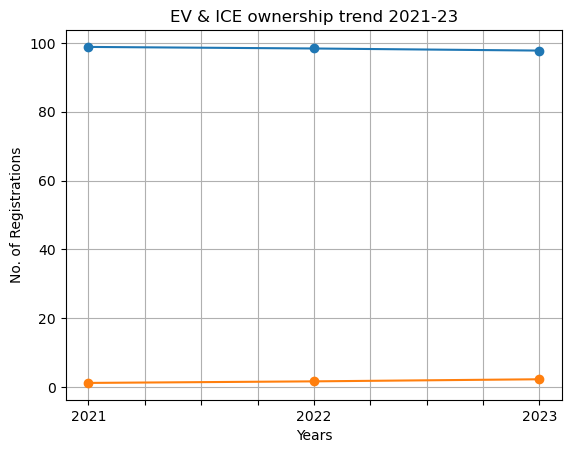

Fuel Type,Internal Combustion Engine,Hybrid & BEV
2021,98.809259,1.190741
2022,98.353614,1.646386
2023,97.745362,2.254638


In [7]:
#Comparison of ICE & EV by percentage

firstyear_total= types["Registrations as at 31 January 2021"].sum()
secondyear_total= types["Registrations as at 31 January 2022"].sum()
thirdyear_total= types["Registrations as at 31 January 2023"].sum()

types["2021"]=types["Registrations as at 31 January 2021"]/firstyear_total*100
types["2022"]=types["Registrations as at 31 January 2022"]/secondyear_total*100
types["2023"]=types["Registrations as at 31 January 2023"]/thirdyear_total*100

types_new= types.drop(['Registrations as at 31 January 2021','Registrations as at 31 January 2022',
                       'Registrations as at 31 January 2023'],axis=1)

types_new= types_new[["2021","2022","2023"]].T
types_new["Hybrid & BEV"]= types_new["Hybrid"]+types_new["Battery Electric Vehicle"]

comparison_df= types_new[["Internal Combustion Engine","Hybrid & BEV"]]
comparison_df.plot(marker="o", title= "EV & ICE ownership trend 2021-23", grid=True, legend=False)
plt.xlabel("Years")
plt.xticks(rotation= 0)
plt.ylabel("No. of Registrations")
plt.savefig("Output/Ownership trends comparison")

plt.show()
comparison_df

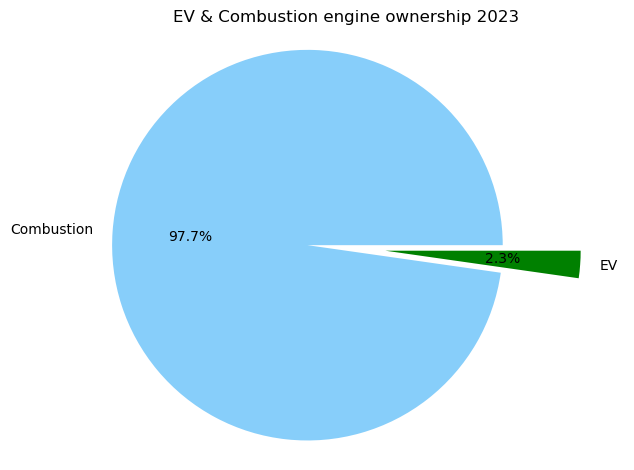

In [8]:
#EV & combustion engine comparison for 2023
years_df= comparison_df[["Internal Combustion Engine","Hybrid & BEV"]].T
types_2023 = years_df["2023"]
plt.title("EV & Combustion engine ownership 2023")
labels= ["Combustion", "EV"]
plt.pie(types_2023, explode=(0,0.4), labels=labels, colors=("lightskyblue","green"), autopct="%1.1f%%",
          startangle=360)
plt.axis("equal")
plt.tight_layout()
plt.savefig("Output/Ownership comparison 2023")

plt.show()

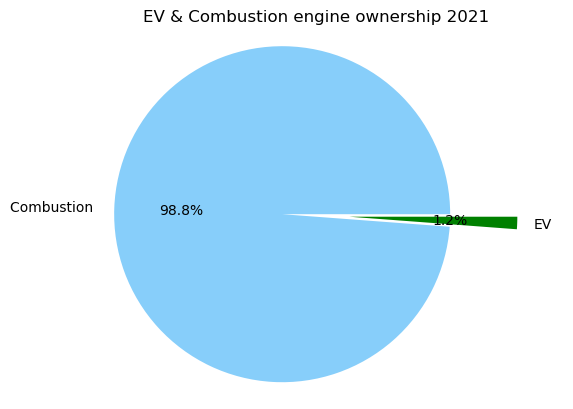

In [9]:
#EV & combustion engine comparison for 2021
types_2023 = years_df["2021"]
plt.title("EV & Combustion engine ownership 2021")
labels= ["Combustion ", "EV"]
plt.pie(types_2023, explode=(0,0.4), labels=labels, colors=("lightskyblue","green"), autopct="%1.1f%%",
          startangle=360)
plt.axis("equal")
plt.savefig("Output/Ownership comparison 2021")

plt.show()

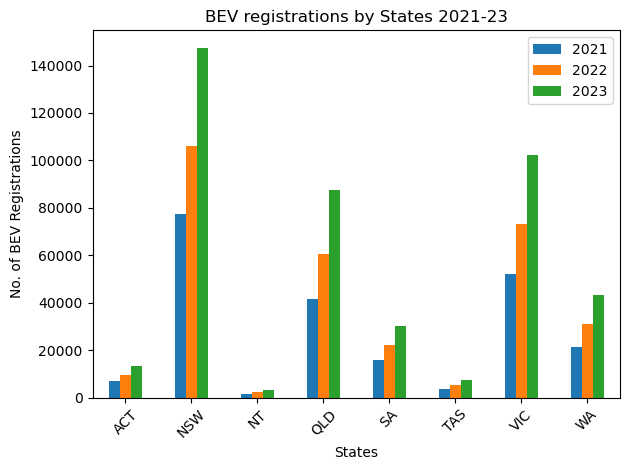

,2021,2022,2023
State,,,
ACT,6995,9703,13238
NSW,77356,106214,147469
NT,1363,2167,3054
QLD,41580,60745,87371
SA,15730,22252,30242
TAS,3551,5233,7348
VIC,52313,73079,102450
WA,21201,30868,43192


In [11]:
#State BEV registrations comparison 

State_BEV= BEV_data.groupby("State").sum()
State_totals= State_BEV[["Registrations as at 31 January 2021","Registrations as at 31 January 2022",
                         "Registrations as at 31 January 2023"]]
renamed= State_totals.rename(columns={"Registrations as at 31 January 2021":"2021",
                           "Registrations as at 31 January 2022":"2022",
                           "Registrations as at 31 January 2023":"2023"})

renamed.plot(kind= "bar", title="BEV registrations by States 2021-23")
plt.xlabel("States")
plt.xticks(rotation= 45)
plt.ylabel("No. of BEV Registrations")
plt.tight_layout()
plt.savefig("Output/States_comparison.png")
plt.show()

renamed

In [14]:
#plotting postcodes with high EV ownership
postcode= pd.read_csv("Resources/australian_postcodes.csv")
postcodes_df= postcode.rename(columns={"postcode":"Postcode"})
postcodes_df["Postcode"]= postcodes_df["Postcode"].drop_duplicates()

merged= pd.merge(BEV_data,postcodes_df, on="Postcode", how="inner")

merged_short= merged[["Postcode","Lat_precise","Long_precise","Registrations as at 31 January 2023"]]
BEV_postcodes = merged_short.sort_values(by="Registrations as at 31 January 2023", ascending=False)
top_postcodes= BEV_postcodes.loc[BEV_postcodes["Registrations as at 31 January 2023"]>1000]

BEV_plot = top_postcodes.hvplot.points("Long_precise","Lat_precise",
    geo = True, color="Postcode", size= "Registrations as at 31 January 2023",
    tiles = "OSM", frame_width = 700, frame_height = 500, scale= 0.5, colorbar=False)

BEV_plot
#saved as EV ownersip locations using screen capture as could not get hvlpot save to run

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Long_precise,Lat_precise]   (Postcode,Registrations as at 31 January 2023)

## Mich plot of age breakdown per suburbs for each vehicle type

Battery Electric Vehicles

In [30]:
# read in the file
plot_file_path = 'Resources/BEV_top10_total.csv'
plot_df = pd.read_csv(plot_file_path)
#filter out the total rows, first remove any leading or trailling spaces
plot_df['Age'] = plot_df['Age'].str.strip()
f_plot_df = plot_df[plot_df['Age'] != 'Total']
#get the postcodes to plot from the datafile
pc_to_plot = f_plot_df['Postcode'].unique()

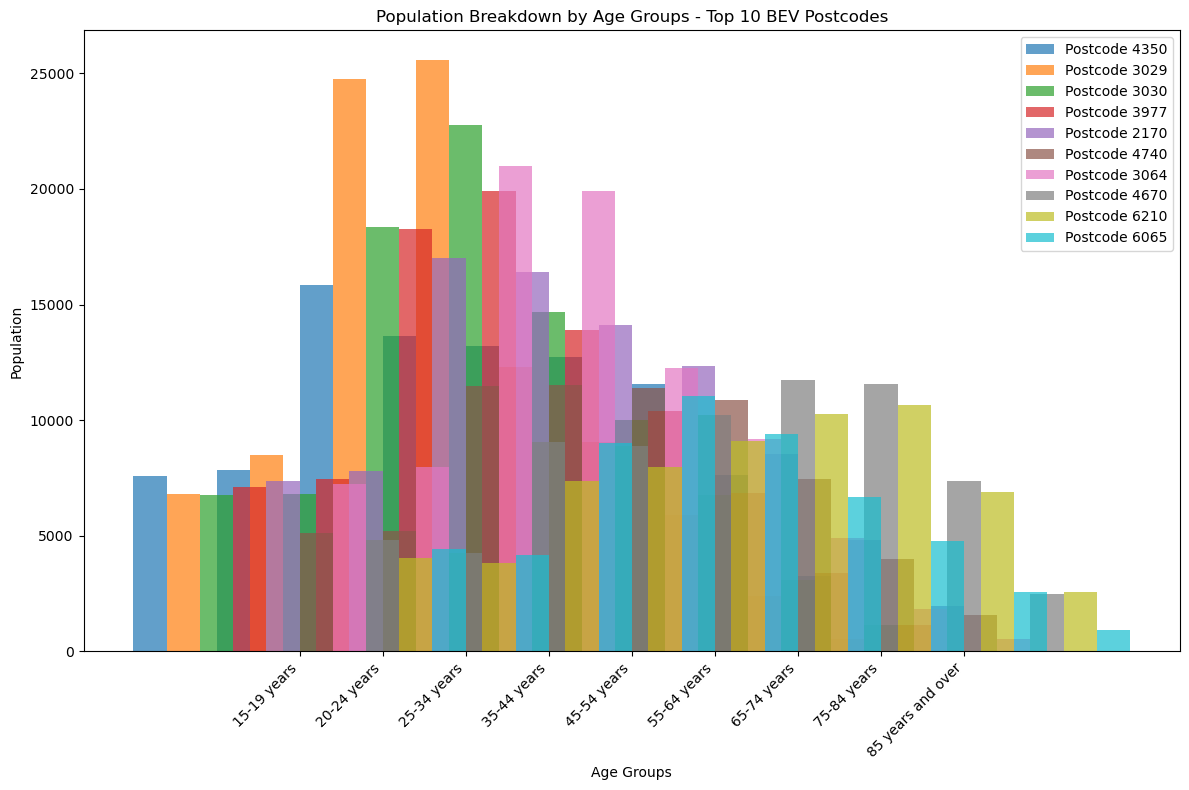

In [31]:
# Set up the figure and axis
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)

# Set the width of each bar
bar_width = 0.4

# Plot all postcodes on one graph using a grouped bar plot
for i, postcode in enumerate(pc_to_plot):
    subset_by_postcode = f_plot_df[f_plot_df['Postcode'] == postcode]
    
    # Calculate the x-coordinates for each bar
    x_positions = [j + i * (bar_width) for j in range(len(subset_by_postcode))]
        
    # Plot the bars
    ax.bar(x_positions,
           subset_by_postcode['Population'],
           width=bar_width,
           label=f'Postcode {postcode}', 
           alpha=0.7
          )

# Set x-axis ticks and labels
ax.set_xticks([i + bar_width * (len(pc_to_plot) - 1) / 2 for i in range(len(subset_by_postcode))])
ax.set_xticklabels(subset_by_postcode['Age'])

plt.title('Population Breakdown by Age Groups - Top 10 BEV Postcodes')
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.legend()
plt.tight_layout()
plt.savefig(f'Output/Population_Breakdown_Postcode_BEV.png')
plt.show()

Hybrid Vehicles

In [17]:
# read in the file
plot_file_path = 'Resources/Hybrid_top10_total.csv'
plot_df = pd.read_csv(plot_file_path)
#filter out the total rows, first remove any leading or trailling spaces
plot_df['Age'] = plot_df['Age'].str.strip()
f_plot_df = plot_df[plot_df['Age'] != 'Total']
#get the postcodes to plot from the datafile
pc_to_plot = f_plot_df['Postcode'].unique()

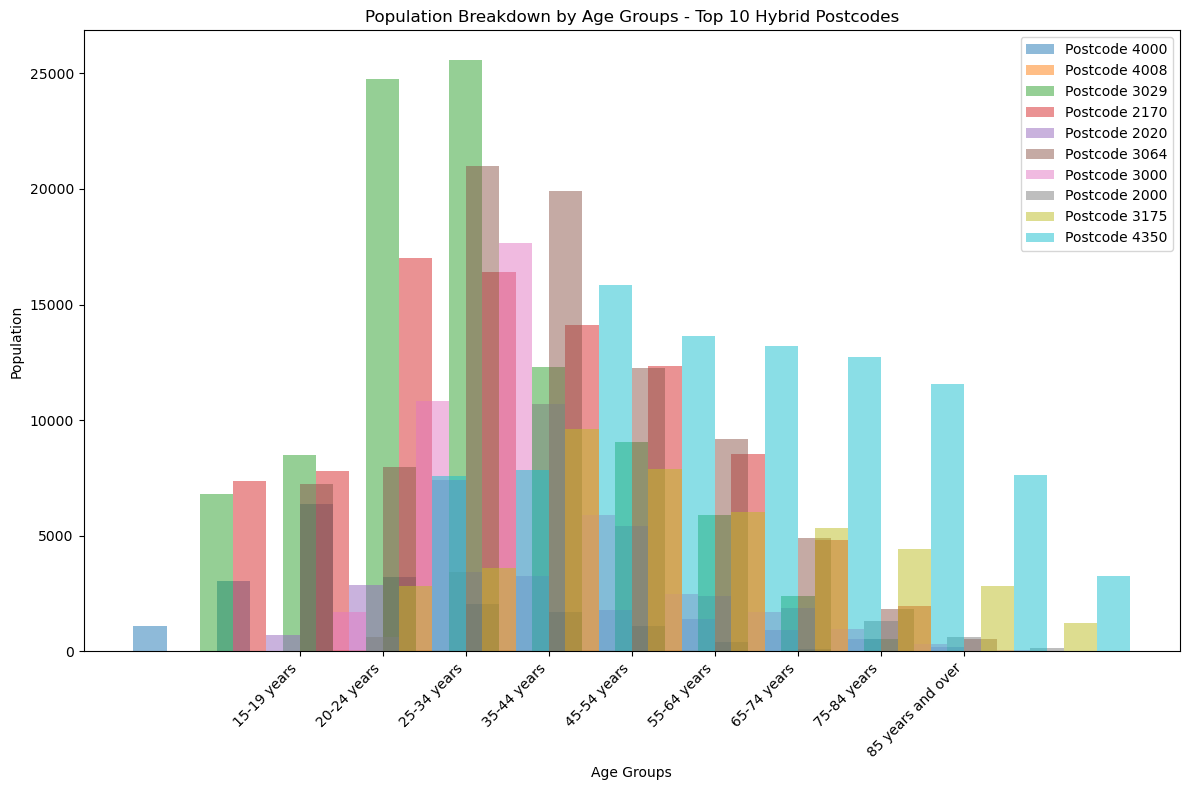

In [18]:
# Set up the figure and axis
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)

# Set the width of each bar
bar_width = 0.4

# Plot all postcodes on one graph using a grouped bar plot
for i, postcode in enumerate(pc_to_plot):
    subset_by_postcode = f_plot_df[f_plot_df['Postcode'] == postcode]
    
    # Calculate the x-coordinates for each bar
    x_positions = [j + i * (bar_width) for j in range(len(subset_by_postcode))]
    
    # Plot the bars
    ax.bar(x_positions,
           subset_by_postcode['Population'],
           width=bar_width,
           label=f'Postcode {postcode}', 
           alpha=0.5
          )

# Set x-axis ticks and labels
ax.set_xticks([i + bar_width * (len(pc_to_plot) - 1) / 2 for i in range(len(subset_by_postcode))])
ax.set_xticklabels(subset_by_postcode['Age'])

plt.title('Population Breakdown by Age Groups - Top 10 Hybrid Postcodes')
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.legend()
plt.tight_layout()
plt.savefig(f'Output/Population_Breakdown_Postcode_Hybrid.png')
plt.show()

Internal Combustion Engines

In [19]:
# read in the file
plot_file_path = 'Resources/ICE_top10_total.csv'
plot_df = pd.read_csv(plot_file_path)
#filter out the total rows, first remove any leading or trailling spaces
plot_df['Age'] = plot_df['Age'].str.strip()
f_plot_df = plot_df[plot_df['Age'] != 'Total']
#get the postcodes to plot from the datafile
pc_to_plot = f_plot_df['Postcode'].unique()


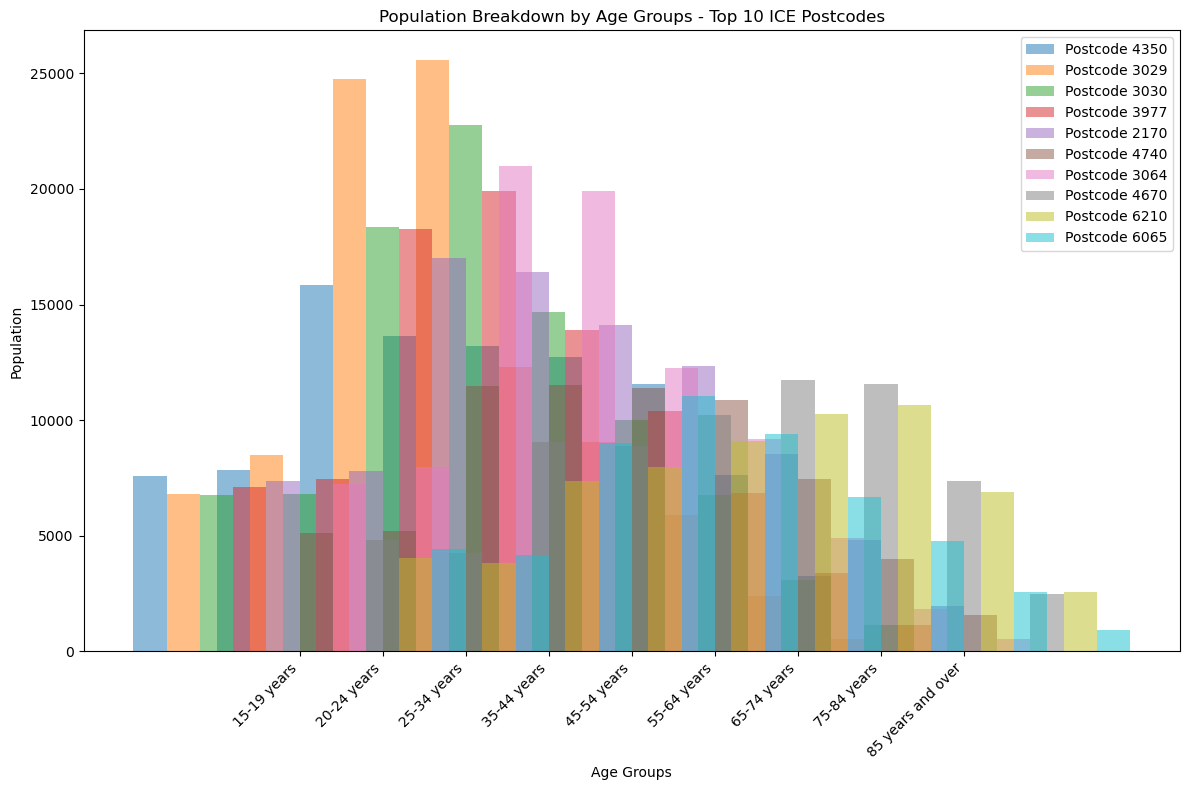

In [20]:
# Set up the figure and axis
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)

# Set the width of each bar
bar_width = 0.4

# Plot all postcodes on one graph using a grouped bar plot
for i, postcode in enumerate(pc_to_plot):
    subset_by_postcode = f_plot_df[f_plot_df['Postcode'] == postcode]
    
    # Calculate the x-coordinates for each bar
    x_positions = [j + i * (bar_width) for j in range(len(subset_by_postcode))]
    
    # Plot the bars
    ax.bar(x_positions,
           subset_by_postcode['Population'],
           width=bar_width,
           label=f'Postcode {postcode}', 
           alpha=0.5
          )

# Set x-axis ticks and labels
ax.set_xticks([i + bar_width * (len(pc_to_plot) - 1) / 2 for i in range(len(subset_by_postcode))])
ax.set_xticklabels(subset_by_postcode['Age'])

plt.title('Population Breakdown by Age Groups - Top 10 ICE Postcodes')
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.legend()
plt.tight_layout()
plt.savefig(f'Output/Population_Breakdown_Postcode_ICE.png')
plt.show()

# Pri coding for graph

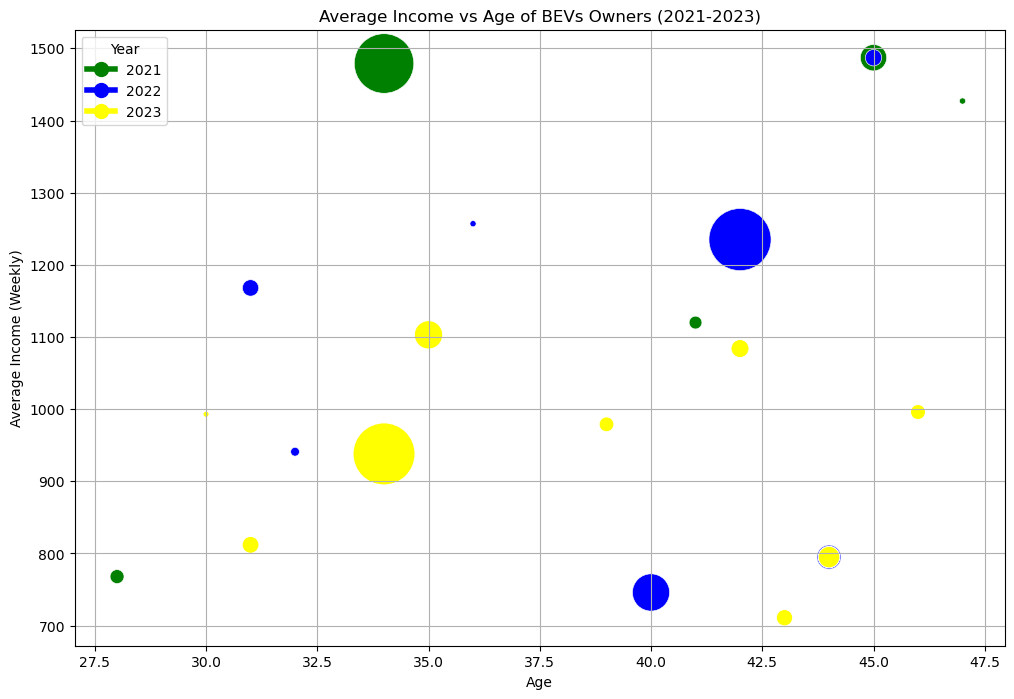

In [21]:
file_path = 'Resources/merged_data.csv'
data = pd.read_csv(file_path)

# Filter the data for only BEV (Battery Electric Vehicles)
bev_data = data[data['Fuel Type'] == 'BEV']

# Filter the data to include only the years 2021, 2022, and 2023
years_of_interest = [2021, 2022, 2023]
bev_data_years = bev_data[bev_data['Year'].isin(years_of_interest)]

# Group the data by age and year to calculate average income and total registrations per age for each year
grouped_data_years = bev_data_years.groupby(['Year', 'Age']).agg({'Average Income': 'mean', 'Registrations': 'sum'}).reset_index()

# Define the colors for each year
colors = {2021: 'green', 2022: 'blue', 2023: 'yellow'}

# Plotting
plt.figure(figsize=(12, 8))
for year in years_of_interest:
    year_data = grouped_data_years[grouped_data_years['Year'] == year]
    sns.scatterplot(data=year_data, x='Age', y='Average Income', size='Registrations', 
                    color=colors[year], sizes=(20, 2000), marker='o')

plt.title('Average Income vs Age of BEVs Owners (2021-2023)')
plt.xlabel('Age')
plt.ylabel('Average Income (Weekly)')
plt.grid(True)

# Creating a custom legend for years
legend_labels = [plt.Line2D([0], [0], color=color, lw=4, marker='o', markersize=10) for color in colors.values()]
plt.legend(legend_labels, [f'{year}' for year in years_of_interest], title='Year')
plt.savefig(f'Output/Average_Income_vs_Age_of_BEV_owners.png')
plt.show()